# Topic 42 - Tuning Neural Networks + Deep NLP

- 06/08/21
- onl01-dtsc-ft-022221

## Learning Objectives

- Learn about Word Embeddings.
    - Discuss word Embeddings and their advantages
    - Training Word2Vec models
    - ~~Using pretrained word embeddings~~ [Another time]
    
- Learn about Sequence Models and Recurrent Neural Networks
    - LSTMs with word embeddings. 
    
    
- Activity: Predicting Stack Overflow post quality. 

- Learn about Tuning Neural Networks
    - Discuss the different options available for tuning neural networks

    - Discuss some rules of thumb for tuning Neural Networks

    - Learn how to use GridSearchCV with Keras neural neural networks.

    - ~~Learn how to create your own custom scorer for sklearn (and why you'd want to)~~

# Appendix Topic: Deep Natural Language Processing

## Review: NLP & Word Vectorization

> - As a reminder, machine learning models needed text to be converted to numbers ("vectorization") before training the model. 
    - We used frequency counts or tf-idf values to produce numeric values for each word. 
    - We trained the models to look for the presence/absence of words to classify texts.

# Word Embeddings

- Word embeddings are vectorized words representing their **semantic meaning**.
- They are created with an arbitrary length (typically 100 points).


- Convert words into a vector space
    - Each word gets its own unique vector. 
    - Vectors capture how similar various words are.
   

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-word-embeddings-online-ds-ft-100719/master/images/vectors.png">

>- Once we have word embeddings, we can actually identify related words based on meaning. 

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-word-embeddings-online-ds-ft-100719/master/images/embeddings.png">

## Resources

- [How Embeddings are Created](https://calvinfeng.gitbook.io/machine-learning-notebook/supervised-learning/natural-language-processing/word2vec)
- [Creating Word Embeddings: Coding the Word2Vec Algorithm in Python using Deep Learning](https://towardsdatascience.com/creating-word-embeddings-coding-the-word2vec-algorithm-in-python-using-deep-learning-b337d0ba17a8)
- Kaggle Tutorial:  https://www.kaggle.com/learn/embeddings
- Google Embedding Crash Course: https://developers.google.com/machine-learning/crash-course/embeddings

## Word2Vec

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-using-word2vec-online-ds-ft-100719/master/images/training_data.png">

### Skip-Gram Model

- Train the MLP to find the best weights (context) to map word-to-word
- But since words close to another usually contain context, we're _really_ teaching it context in those weights
- Gut check: similar contexted words can be exchanged
    + EX: "A fluffy **dog** is a great pet" <--> "A fluffy **cat** is a great pet"

- By training a text-generation model, we wind up with a lookup table where each word has its own vector 

- Resource: 
    - [skip-gram vs CBOW methods](https://towardsdatascience.com/nlp-101-word2vec-skip-gram-and-cbow-93512ee24314)

#### How to create an emebding:
- Resources:
    - [How Embeddings are Created](https://calvinfeng.gitbook.io/machine-learning-notebook/supervised-learning/natural-language-processing/word2vec)
    - [Creating Word Embeddings: Coding the Word2Vec Algorithm in Python using Deep Learning](https://towardsdatascience.com/creating-word-embeddings-coding-the-word2vec-algorithm-in-python-using-deep-learning-b337d0ba17a8)


- To create a word embedding, we train a shallow neural network for a fake task. 

    - The fake task is to use one-hot-encoded text data to then predict the probability of seeing every other word in the corpus within the same context as the one-hot-encoded word.
    

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-using-word2vec-online-ds-ft-100719/master/images/new_skip_gram_net_arch.png">


<img src="https://raw.githubusercontent.com/learn-co-students/dsc-using-word2vec-online-ds-ft-100719/master/images/new_word2vec_weight_matrix_lookup_table.png">

## GloVe - Global Vectors for Word Representation

### Transfer Learning

- Usually embeddings are hundreds of dimensions
- Just use the word embeddings already learned from before!
    + Unless very specific terminology, context will likely carry within language
- Comparable to CNN transfer learning

# Activity: Creating our own word embeddings

### Data: Stack Overflow Questions

- Stack Overflow Answers: https://www.kaggle.com/imoore/60k-stack-overflow-questions-with-quality-rate


- Kaggle Description:
    - We collected 60,000 Stack Overflow questions from 2016-2020 and classified them into three categories:

        - HQ: High-quality posts with a total of 30+ score and without a single edit.
        - LQ_EDIT: Low-quality posts with a negative score, and multiple community edits. However, they still remain open after those changes.
        - LQ_CLOSE: Low-quality posts that were closed by the community without a single edit.

In [1]:
from tensorflow.random import set_seed
set_seed(321)

import tensorflow as tf
print(tf.__version__)

import numpy as np 
np.random.seed(321)

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os,sys

plt.rcParams['figure.figsize'] = [8,4]

2.4.0


In [2]:
df = pd.read_csv('../data/stack_overflow.csv.gz')
df

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ
...,...,...,...,...,...,...
44995,60461435,Convert List<String> to string C# - asp.net - ...,<p>I am new to this and I am asking for help t...,<c#><asp.net><sql-server>,2020-02-29 02:22:18,LQ_CLOSE
44996,60461754,Does Python execute code from the top or botto...,<p>I am working on learning Python and was won...,<python>,2020-02-29 03:33:59,LQ_CLOSE
44997,60462001,how to change payment date in Azure?,<p>It looks like it costs 8 days per month in ...,<azure><billing>,2020-02-29 04:34:16,LQ_CLOSE
44998,60465318,how to implement fill in the blank in Swift,"<p>""I _____ any questions.""</p>\n\n<p>I want t...",<ios><swift>,2020-02-29 12:50:43,LQ_CLOSE


### Dealing with HTML Tags

- First, should we remove them?
- If yes, use beautiful soup?

In [3]:
## Getting text example for dealing with html tags
test_body = df.loc[4,'Body']
test_body

'<p>I\'m using custom floatingactionmenu. I need to implement scale animation on show/hide menu button like here\n<a href="https://material-design.storage.googleapis.com/publish/material_v_4/material_ext_publish/0B6Okdz75tqQsZU1kZWhRYWZpUDg/components-buttons-fab-behavior_01_xhdpi_012.mp4" rel="noreferrer">floating action button behaviour</a></p>\n\n<p>Is there any way to do this ?</p>\n'

In [4]:
from bs4 import BeautifulSoup
test_soup = BeautifulSoup(test_body)
test_soup.text

"I'm using custom floatingactionmenu. I need to implement scale animation on show/hide menu button like here\nfloating action button behaviour\nIs there any way to do this ?\n"

In [5]:
df['soups'] = df['Body'].map(lambda x:BeautifulSoup(x).text )
df

,Id,Title,Body,Tags,CreationDate,Y,soups
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE,I'm already familiar with repeating tasks ever...
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ,I'd like to understand why Java 8 Optionals we...
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ,I am attempting to overlay a title over an ima...
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ,"The question is very simple, but I just could ..."
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ,I'm using custom floatingactionmenu. I need to...
...,...,...,...,...,...,...,...
44995,60461435,Convert List<String> to string C# - asp.net - ...,<p>I am new to this and I am asking for help t...,<c#><asp.net><sql-server>,2020-02-29 02:22:18,LQ_CLOSE,I am new to this and I am asking for help to c...
44996,60461754,Does Python execute code from the top or botto...,<p>I am working on learning Python and was won...,<python>,2020-02-29 03:33:59,LQ_CLOSE,I am working on learning Python and was wonder...
44997,60462001,how to change payment date in Azure?,<p>It looks like it costs 8 days per month in ...,<azure><billing>,2020-02-29 04:34:16,LQ_CLOSE,It looks like it costs 8 days per month in Azu...
44998,60465318,how to implement fill in the blank in Swift,"<p>""I _____ any questions.""</p>\n\n<p>I want t...",<ios><swift>,2020-02-29 12:50:43,LQ_CLOSE,"""I _____ any questions.""\nI want to implement ..."


In [6]:
## join together title and body. 
df['text'] = df['Title']+'; '+df['soups']
df

,Id,Title,Body,Tags,CreationDate,Y,soups,text
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE,I'm already familiar with repeating tasks ever...,Java: Repeat Task Every Random Seconds; I'm al...
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ,I'd like to understand why Java 8 Optionals we...,Why are Java Optionals immutable?; I'd like to...
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ,I am attempting to overlay a title over an ima...,Text Overlay Image with Darkened Opacity React...
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ,"The question is very simple, but I just could ...",Why ternary operator in swift is so picky?; Th...
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ,I'm using custom floatingactionmenu. I need to...,hide/show fab with scale animation; I'm using ...
...,...,...,...,...,...,...,...,...
44995,60461435,Convert List<String> to string C# - asp.net - ...,<p>I am new to this and I am asking for help t...,<c#><asp.net><sql-server>,2020-02-29 02:22:18,LQ_CLOSE,I am new to this and I am asking for help to c...,Convert List<String> to string C# - asp.net - ...
44996,60461754,Does Python execute code from the top or botto...,<p>I am working on learning Python and was won...,<python>,2020-02-29 03:33:59,LQ_CLOSE,I am working on learning Python and was wonder...,Does Python execute code from the top or botto...
44997,60462001,how to change payment date in Azure?,<p>It looks like it costs 8 days per month in ...,<azure><billing>,2020-02-29 04:34:16,LQ_CLOSE,It looks like it costs 8 days per month in Azu...,how to change payment date in Azure?; It looks...
44998,60465318,how to implement fill in the blank in Swift,"<p>""I _____ any questions.""</p>\n\n<p>I want t...",<ios><swift>,2020-02-29 12:50:43,LQ_CLOSE,"""I _____ any questions.""\nI want to implement ...","how to implement fill in the blank in Swift; ""..."


## Creating Word Embeddings with `Word2Vec`

### Resources:

- Two Part Word2Vec Tutorial  (linked from Canvas)
    - [Part 1: The Skip-Gram Model](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)
    - [Part 2: Negative Sampling](http://mccormickml.com/2017/01/11/word2vec-tutorial-part-2-negative-sampling/)
    
- White Paper on word2vec (downloads file):
    - https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf


- `sentences`: dataset to train on
- `size`: how big of a word vector do we want
- `window`: how many words around the target word to train with
- `min_count`: how many times the word shows up in corpus; we don't want words that are rarely used
- `workers`: number of threads (individual task "workers")

```python
from gensim.models import Word2Vec

model = Word2Vec(data, size=100, window=5, min_count=1, workers=4)

model.train(data, total_examples=model.corpus_count)

```

<!-- 
#### Word2Vec params

```python
## For initializing model
sentences=None,
    size=100,
    alpha=0.025,
    window=5,
    min_count=5,
    max_vocab_size=None,
    sample=0.001,
    seed=1,
    workers=3,
    min_alpha=0.0001,
    sg=0,
    hs=0,
    negative=5,
    cbow_mean=1,
    hashfxn=<built-in function hash>,
    iter=5,
    null_word=0,
    trim_rule=None,
    sorted_vocab=1,
    batch_words=10000,
    compute_loss=False,
    callbacks=(),
    
    
## For training 
    sentences,
    total_examples=None,
    total_words=None,
    epochs=None,
    start_alpha=None,
    end_alpha=None,
    word_count=0,
    queue_factor=2,
    report_delay=1.0,
    compute_loss=False,
    callbacks=(),
``` -->

In [7]:
## NLP imports
from nltk import word_tokenize, TweetTokenizer, regexp_tokenize
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
import gensim
print(gensim.__version__)

from sklearn.model_selection import train_test_split

3.8.3


In [8]:
## use gensim's simple preprocess
df['cleaned-text'] = df['text'].apply(lambda x: simple_preprocess(x,deacc=True))
df

,Id,Title,Body,Tags,CreationDate,Y,soups,text,cleaned-text
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE,I'm already familiar with repeating tasks ever...,Java: Repeat Task Every Random Seconds; I'm al...,"[java, repeat, task, every, random, seconds, a..."
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ,I'd like to understand why Java 8 Optionals we...,Why are Java Optionals immutable?; I'd like to...,"[why, are, java, optionals, immutable, like, t..."
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ,I am attempting to overlay a title over an ima...,Text Overlay Image with Darkened Opacity React...,"[text, overlay, image, with, darkened, opacity..."
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ,"The question is very simple, but I just could ...",Why ternary operator in swift is so picky?; Th...,"[why, ternary, operator, in, swift, is, so, pi..."
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ,I'm using custom floatingactionmenu. I need to...,hide/show fab with scale animation; I'm using ...,"[hide, show, fab, with, scale, animation, usin..."
...,...,...,...,...,...,...,...,...,...
44995,60461435,Convert List<String> to string C# - asp.net - ...,<p>I am new to this and I am asking for help t...,<c#><asp.net><sql-server>,2020-02-29 02:22:18,LQ_CLOSE,I am new to this and I am asking for help to c...,Convert List<String> to string C# - asp.net - ...,"[convert, list, string, to, string, asp, net, ..."
44996,60461754,Does Python execute code from the top or botto...,<p>I am working on learning Python and was won...,<python>,2020-02-29 03:33:59,LQ_CLOSE,I am working on learning Python and was wonder...,Does Python execute code from the top or botto...,"[does, python, execute, code, from, the, top, ..."
44997,60462001,how to change payment date in Azure?,<p>It looks like it costs 8 days per month in ...,<azure><billing>,2020-02-29 04:34:16,LQ_CLOSE,It looks like it costs 8 days per month in Azu...,how to change payment date in Azure?; It looks...,"[how, to, change, payment, date, in, azure, it..."
44998,60465318,how to implement fill in the blank in Swift,"<p>""I _____ any questions.""</p>\n\n<p>I want t...",<ios><swift>,2020-02-29 12:50:43,LQ_CLOSE,"""I _____ any questions.""\nI want to implement ...","how to implement fill in the blank in Swift; ""...","[how, to, implement, fill, in, the, blank, in,..."


In [9]:
## set the embedding size (normally I'd do 100, but doing 50 for time)
EMBEDDING_SIZE=50

## intiitalize the w2v odel
w2v_model = Word2Vec(df['cleaned-text'],size=EMBEDDING_SIZE,
                     window=5,min_count=3,workers=4,seed=321)
w2v_model.corpus_count

45000

In [10]:
## Train w2v model
w2v_model.train(df['cleaned-text'],total_words=w2v_model.corpus_total_words,
                epochs=w2v_model.epochs)

(20449836, 24621055)

In [11]:
# List of words the word2vec model learned word vectors for
w2v_model.wv.index2word[:20]

['the',
 'to',
 'in',
 'is',
 'and',
 'this',
 'of',
 'it',
 'for',
 'if',
 'that',
 'my',
 'how',
 'with',
 'have',
 'but',
 'not',
 'on',
 'can',
 'from']

In [12]:
## w2v saves word vectors as .wv
type(w2v_model.wv)

gensim.models.keyedvectors.Word2VecKeyedVectors

In [13]:
## Saving the keyed vectors as their own var
wv = w2v_model.wv
wv

In [14]:
## wv's vocab contains all words it learned
len(wv.vocab)

50931

In [15]:
## wv can be used as a dictionary to extract word vectors
wv['python']

array([ 0.17668268,  0.0190404 ,  1.6987623 , -0.4377778 , -1.3672557 ,
       -2.6212459 ,  1.3754942 , -4.179545  , -0.18878941,  2.349881  ,
        3.9411304 ,  0.34754163,  1.1086172 , -0.18726745, -0.11283847,
        0.58691096,  0.96852154,  2.5313404 , -0.26326612, -2.1990817 ,
        0.44162774, -1.6828942 , -0.6299193 ,  2.0506032 , -4.1627526 ,
       -2.526407  ,  1.1870352 ,  0.55995506, -0.01250632,  2.44917   ,
        3.6798978 , -3.5028129 ,  0.9525284 ,  3.2811706 , -0.78171265,
        3.374713  , -0.9534351 ,  0.7245328 ,  0.6106611 , -3.3435667 ,
       -5.315221  , -0.29797852, -1.0867469 ,  0.55248064,  3.6827688 ,
        1.1569574 , -2.1032872 ,  2.4365616 , -1.3461227 ,  0.35341844],
      dtype=float32)

In [16]:
## Can get words that are similiar or dissimilar to specific word
# get python, top 20
wv.most_similar('python',topn=20)

[('tensorflow', 0.671021044254303),
 ('anaconda', 0.6492372751235962),
 ('matlab', 0.6358253359794617),
 ('pycharm', 0.6317517161369324),
 ('bleach', 0.6272275447845459),
 ('perl', 0.6208903193473816),
 ('pandas', 0.6051687002182007),
 ('pip', 0.5982620716094971),
 ('numpy', 0.5932825803756714),
 ('jupyter', 0.5928680896759033),
 ('interpreter', 0.5894469618797302),
 ('django', 0.572895348072052),
 ('conda', 0.5707824230194092),
 ('steemjs', 0.5650075078010559),
 ('pyspark', 0.5591281652450562),
 ('graphenejs', 0.5573902726173401),
 ('virtualenv', 0.555435061454773),
 ('shell', 0.5552821159362793),
 ('opencv', 0.552459180355072),
 ('rstudio', 0.5470351576805115)]

In [17]:
## Can get words that are similiar or dissimilar to specific word
# +python, -error, top 20
wv.most_similar(positive=['python'],negative=['error'],topn=20)

[('gensim', 0.5979401469230652),
 ('fct', 0.5000830292701721),
 ('corpus', 0.498113751411438),
 ('panda', 0.4889817535877228),
 ('pytorch', 0.47450369596481323),
 ('cyrillic', 0.47331666946411133),
 ('comprehension', 0.47055771946907043),
 ('firstly', 0.4652247130870819),
 ('elixir', 0.46443936228752136),
 ('normalization', 0.46149614453315735),
 ('artificial', 0.4550503194332123),
 ('nlp', 0.45433366298675537),
 ('anaconda', 0.4543074369430542),
 ('lists', 0.4525841176509857),
 ('vectors', 0.45086196064949036),
 ('gis', 0.4454689919948578),
 ('pythonhosted', 0.4437331557273865),
 ('cite', 0.43961259722709656),
 ('matlab', 0.43786609172821045),
 ('forest', 0.4370948374271393)]

In [18]:
##  can also do math on vectors 
# creating "frustrating error" from frustrating and error
frustrating_error = wv['frustrating'] + wv['error']
frustrating_error

array([-1.5428442 ,  1.6590878 ,  1.431118  , -0.53795004, -2.5737767 ,
       -2.1110396 , -1.9605572 , -1.4764817 , -1.7091931 , -0.34857142,
       -1.6344595 , -1.8625146 ,  1.6618859 , -0.3584355 , -0.75701934,
        4.0438094 ,  2.645385  ,  2.5291724 , -0.19002074, -1.211911  ,
       -0.564147  ,  1.3828396 ,  1.7070115 , -4.36021   ,  2.5223658 ,
        0.48184675,  5.784709  ,  1.4535506 ,  1.2189882 , -0.7631277 ,
        3.2648482 , -0.49283484,  2.2946453 , -0.4374934 ,  2.394087  ,
        1.0782888 ,  4.8773627 ,  1.8404702 ,  1.0188    , -2.2942927 ,
        1.4674525 , -0.7640264 , -2.3134012 ,  0.5799296 ,  0.2158214 ,
        7.4388    , -1.0547576 ,  0.09298024, -1.1359885 ,  2.2695599 ],
      dtype=float32)

In [19]:
## Can also get most_similar to word vector
# get the most simular words to our calculated frustrating_error
wv.most_similar(positive=[frustrating_error])

[('error', 0.9853165149688721),
 ('warning', 0.7933077216148376),
 ('errors', 0.7605682611465454),
 ('exception', 0.7435100078582764),
 ('message', 0.6854788661003113),
 ('assertion', 0.6665105223655701),
 ('saying', 0.6596200466156006),
 ('issue', 0.645969808101654),
 ('invalid', 0.6429773569107056),
 ('compilation', 0.633459746837616)]

In [20]:
# del w2v_model, df

___

## Using Embeddings in Classification

### Embedding Layers
You should make note of a couple caveats that come with using embedding layers in your neural network -- namely:

* The embedding layer must always be the first layer of the network, meaning that it should immediately follow the `Input()` layer 
* All words in the text should be integer-encoded, with each unique word encoded as it's own unique integer  
* The size of the embedding layer must always be greater than the total vocabulary size of the dataset! The first parameter denotes the vocabulary size, while the second denotes the size of the actual word vectors
* The size of the sequences passed in as data must be set when creating the layer (all data will be converted to padded sequences of the same size during the preprocessing step) 


[Keras Documentation for Embedding Layers](https://keras.io/layers/embeddings/).

# Sequence Models - Recurrent Neural Networks

- One of the main disadvantages of machine learning NLP is that the models are assesing the presence or absence of words. 
- They are not analyzing the words in the context of the sentence.

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-understanding-recurrent-neural-networks-online-ds-ft-100719/master/images/unrolled.gif">

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-sequence-model-use-cases-online-ds-ft-100719/master/images/rnn.gif">

## LSTMs & GRUs

- GRU (Gated Recurrent Units (GRUs)
    - Reset Gate
    - Update Gate
    
- LSTM (Long Short Term Memory Cells)
   - Input Gate
   - Forget Gate
   - Output Gate

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-sequence-model-use-cases-online-ds-ft-100719/master/images/RNN-unrolled.png">

Each word will have a vector of contexts: the embeddings!

# **Activity Part 2: Text Classification with Embeddings & Sequences**

### Defining The Target

In [21]:
## What is the distribution of classes in our target?
df['Y'].value_counts()

HQ          15000
LQ_EDIT     15000
LQ_CLOSE    15000
Name: Y, dtype: int64

In [22]:
## Remapping target
target_map = {"LQ_CLOSE":0, 
              'LQ_EDIT': 1,
              "HQ":2}

In [23]:
## map targets
df['target'] = df['Y'].replace(target_map)
df['target'].value_counts()

2    15000
1    15000
0    15000
Name: target, dtype: int64

#### *About that multi-classification*...
- After a couple hours or fighting to improve the metrics for the 3-class task, I decided to create a Hot-Dog/ Not-Hot-Dog classifier. 

<img src="images/hot_dog_not_hot_dog.png" width=30%>

In [24]:
## Making our hot-dog/not-dog target
target_map_binary = {"LQ_CLOSE":0, 
                      'LQ_EDIT': 0,
                      "HQ":1}
df['target_binary'] = df['Y'].replace(target_map_binary)

df['target_binary'].value_counts()

0    30000
1    15000
Name: target_binary, dtype: int64

In [25]:
from tensorflow.keras import layers,optimizers,callbacks, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import text,sequence

# from keras.preprocessing import text,sequence
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from gensim.utils import simple_preprocess
from sklearn import metrics

### Defining X,y + train test split

In [26]:
## Make X and y_t
X = df['cleaned-text'].copy()
# y_t = to_categorical(df['target'])
y_t = to_categorical(df['target_binary'])
y_t

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [27]:
X_train, X_test, y_train, y_test =train_test_split(X,y_t,test_size=0.3,
                                                   random_state=123) 
print(X_train.shape,y_test.shape)
# pd.Series(y_test).value_counts(normalize=True)
X_test

(31500,) (13500, 2)


12250    [angular, get, activatedroute, url, want, to, ...
27836    [how, do, put, condition, on, one, of, the, co...
5393     [where, can, upload, json, file, and, get, jso...
44722    [why, is, the, select, not, visible, entirely,...
36573    [solve, equation, dependency, variables, by, t...
                               ...                        
15396    [how, to, convert, video, to, gif, image, with...
43712    [portfolio, gallery, without, all, filter, cur...
42048    [ssis, package, to, update, sql, table, have, ...
33397    [python, none, object, could, you, please, exp...
10147    [java, join, concept, see, my, code, in, with,...
Name: cleaned-text, Length: 13500, dtype: object

### Tokenizing with Keras

In [28]:
## Keras has its own Tokenizer
tokenizer = text.Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)

In [29]:
## tokenizer has assigned integer lookup value for each word
tokenizer.word_index

{'the': 1,
 'to': 2,
 'in': 3,
 'is': 4,
 'and': 5,
 'this': 6,
 'of': 7,
 'it': 8,
 'for': 9,
 'if': 10,
 'that': 11,
 'how': 12,
 'my': 13,
 'with': 14,
 'have': 15,
 'but': 16,
 'not': 17,
 'on': 18,
 'can': 19,
 'from': 20,
 'string': 21,
 'code': 22,
 'as': 23,
 'new': 24,
 'int': 25,
 'be': 26,
 'error': 27,
 'using': 28,
 'android': 29,
 'an': 30,
 'at': 31,
 'class': 32,
 'am': 33,
 'java': 34,
 'get': 35,
 'file': 36,
 'data': 37,
 'do': 38,
 'when': 39,
 'name': 40,
 'or': 41,
 'like': 42,
 'what': 43,
 'public': 44,
 'want': 45,
 'return': 46,
 'com': 47,
 'so': 48,
 'function': 49,
 'id': 50,
 'value': 51,
 'use': 52,
 'app': 53,
 'any': 54,
 'there': 55,
 'you': 56,
 'are': 57,
 'me': 58,
 'text': 59,
 'import': 60,
 'which': 61,
 'all': 62,
 'here': 63,
 'array': 64,
 'out': 65,
 'type': 66,
 'list': 67,
 'by': 68,
 'void': 69,
 'one': 70,
 'help': 71,
 'system': 72,
 'would': 73,
 'need': 74,
 'user': 75,
 'var': 76,
 'some': 77,
 'true': 78,
 'print': 79,
 'input': 80,


In [30]:
# lookup the words using their integer
tokenizer.index_word

{1: 'the',
 2: 'to',
 3: 'in',
 4: 'is',
 5: 'and',
 6: 'this',
 7: 'of',
 8: 'it',
 9: 'for',
 10: 'if',
 11: 'that',
 12: 'how',
 13: 'my',
 14: 'with',
 15: 'have',
 16: 'but',
 17: 'not',
 18: 'on',
 19: 'can',
 20: 'from',
 21: 'string',
 22: 'code',
 23: 'as',
 24: 'new',
 25: 'int',
 26: 'be',
 27: 'error',
 28: 'using',
 29: 'android',
 30: 'an',
 31: 'at',
 32: 'class',
 33: 'am',
 34: 'java',
 35: 'get',
 36: 'file',
 37: 'data',
 38: 'do',
 39: 'when',
 40: 'name',
 41: 'or',
 42: 'like',
 43: 'what',
 44: 'public',
 45: 'want',
 46: 'return',
 47: 'com',
 48: 'so',
 49: 'function',
 50: 'id',
 51: 'value',
 52: 'use',
 53: 'app',
 54: 'any',
 55: 'there',
 56: 'you',
 57: 'are',
 58: 'me',
 59: 'text',
 60: 'import',
 61: 'which',
 62: 'all',
 63: 'here',
 64: 'array',
 65: 'out',
 66: 'type',
 67: 'list',
 68: 'by',
 69: 'void',
 70: 'one',
 71: 'help',
 72: 'system',
 73: 'would',
 74: 'need',
 75: 'user',
 76: 'var',
 77: 'some',
 78: 'true',
 79: 'print',
 80: 'input',


In [31]:
## Use tokenizer to convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

## whatn does 1 sequence look like?
print(X_train_seq[0])

[33, 365, 1172, 184, 6, 234, 2, 124, 19, 269, 71, 58, 19, 269, 285, 118, 6, 2368, 1311, 10, 4481, 4104, 276, 234, 79, 105, 182, 200, 40, 5056, 80, 79, 376, 5056, 79, 73, 56, 2380, 2116, 10, 1, 4, 256, 41, 1767, 39514, 80, 10, 39514, 234]


In [32]:
## can lookup the words via the tokenizer's index_word 
print(' '.join([tokenizer.index_word[w] for w in X_train_seq[0]]))

am having trouble getting this loop to work can anyone help me can anyone understand why this wont reset if answered incorrectly def loop print please enter your name myname input print hello myname print would you kindly confirm if the is open or closed hacthstatus input if hacthstatus loop


In [33]:
## We need to get all sequences as same length
# what is the len of each sequence?
sequence_lengths = [len(x) for x in X_train_seq]
sequence_lengths[:5]

[50, 39, 167, 151, 32]

In [34]:
## what is the longest sequence?
max(sequence_lengths)

3071

<AxesSubplot:ylabel='Count'>

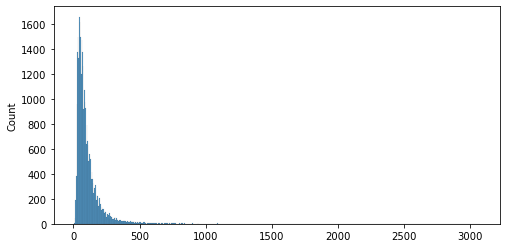

In [35]:
## visualize distribution of lengthsw
sns.histplot(sequence_lengths)

<AxesSubplot:>

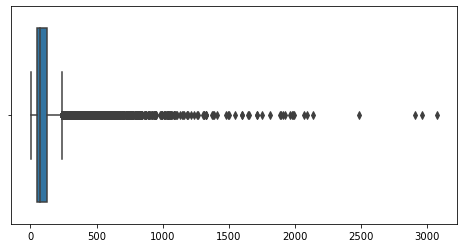

In [36]:
## What would be an approx cutoff for outliers?
sns.boxplot(x=sequence_lengths)

In [37]:
## Defining a max sequence length
MAX_SEQUENCE_LENGTH = 100#max(sequence_lengths)
MAX_SEQUENCE_LENGTH

100

(0.0, 500.0)

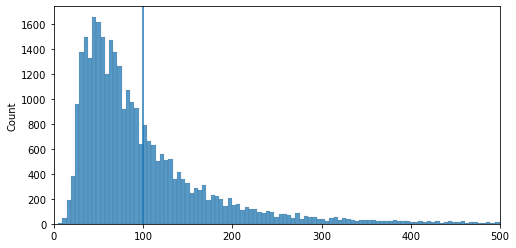

In [38]:
## Plot our cutoff
ax = sns.histplot(sequence_lengths)
ax.axvline(MAX_SEQUENCE_LENGTH)
ax.set_xlim(0,500)

In [39]:
## pad X_train_seq and X_test_seq
X_train_pad = sequence.pad_sequences(X_train_seq,MAX_SEQUENCE_LENGTH)
X_test_pad = sequence.pad_sequences(X_test_seq,MAX_SEQUENCE_LENGTH)
[len(x) for x in X_train_pad[:5]]

[100, 100, 100, 100, 100]

#### Making Our Neural Networks

In [40]:
## Set the max words equal to tokenizer's word index
MAX_WORDS = len(tokenizer.word_index)
MAX_WORDS

100277

In [41]:
## Save num classes for final layer
n_classes = y_train.shape[1]
n_classes

2

## Fitting Our First Model

In [42]:
EMBEDDING_SIZE

50

In [43]:
def make_model():
    """Make a neural network with a new emebdding layer, 
    an LSTM layer with 25 unit, and a final Dense layer appropriate for the task"""
    model= models.Sequential()
    model.add(layers.Embedding(MAX_WORDS+1, EMBEDDING_SIZE))
    model.add(layers.LSTM(25,return_sequences=False))
    # model.add(layers.GlobalAvgPool1D())
    model.add(layers.Dense(n_classes, 
                           activation='softmax'))

    model.compile(loss='categorical_crossentropy',#'categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    display(model.summary())
    return model

In [44]:
model = make_model()
history = model.fit(X_train_pad, y_train, epochs=3,
                    batch_size=128, validation_split=0.2,
                   workers=-1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 50)          5013900   
_________________________________________________________________
lstm (LSTM)                  (None, 25)                7600      
_________________________________________________________________
dense (Dense)                (None, 2)                 52        
Total params: 5,021,552
Trainable params: 5,021,552
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/3
197/197 [==============================] - 19s 87ms/step - loss: 0.5525 - accuracy: 0.7143 - val_loss: 0.3644 - val_accuracy: 0.8471
Epoch 2/3
197/197 [==============================] - 16s 83ms/step - loss: 0.2662 - accuracy: 0.8993 - val_loss: 0.3562 - val_accuracy: 0.8483
Epoch 3/3
197/197 [==============================] - 16s 81ms/step - loss: 0.1751 - accuracy: 0.9373 - val_loss: 0.3788 - val_accuracy: 0.8346


### Model Evaluation Functions

>- Below I broke down the larger evaluation function introduced in study group last week. 
    - I've created several helper functions to simplify the code for the evaluation function.
    - Additionally, we can now use those smaller functions when we don't need a full model evaluation

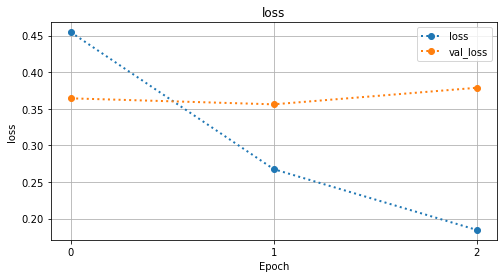

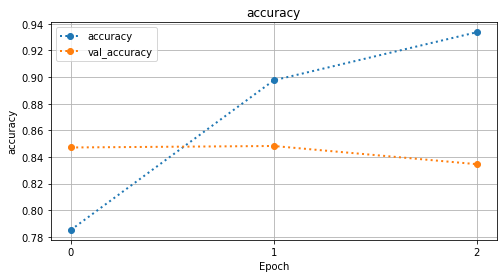

In [45]:
### BREAKING OUR BIG FUNCTION UP INTO HELPER FUNCTIONS
def plot_history(history,model,figsize=(8,4)):
    """Takes a keras history and model and plots 
    all metrics in separate plots for each metric"""
#     print(header,'\t[i] MODEL HISTORY',header,sep='\n')

    ## Make a dataframe out of history
    res_df = pd.DataFrame(history.history)#.plot()

    ## Plot Losses
    plot_kws = dict(marker='o',ls=':',lw=2,figsize=figsize)

    ## Plot all metrics
    metrics_list = model.metrics_names

    for metric in metrics_list:
        ax = res_df[[col for col in res_df.columns if metric in col]].plot(**plot_kws)
        ax.set(xlabel='Epoch',ylabel=metric,title=metric)
        ax.grid()
        ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
        plt.show()


## testing function
plot_history(history, model)

In [46]:
def evaluate_scores(model,X_train,y_train,label='Training',verbose=0):
    """Evaluates a keras model and prints the scores using the provided label."""
    train_scores  = model.evaluate(X_train,y_train,verbose=verbose)#score()
    for i,metric in enumerate(model.metrics_names):
        print(f"\t{label} {metric}: {train_scores[i]:.3f}")

evaluate_scores(model, X_train_pad,y_train,verbose=1)
evaluate_scores(model, X_test_pad,y_test,verbose=1,label='Test')

985/985 [==============================] - 4s 4ms/step - loss: 0.1875 - accuracy: 0.9376
	Training loss: 0.188
	Training accuracy: 0.938
422/422 [==============================] - 2s 5ms/step - loss: 0.3713 - accuracy: 0.8456
	Test loss: 0.371
	Test accuracy: 0.846


	[i] CLASSIFICATION REPORT - TEST DATA

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      9098
           1       0.76      0.78      0.77      4402

    accuracy                           0.85     13500
   macro avg       0.82      0.83      0.83     13500
weighted avg       0.85      0.85      0.85     13500




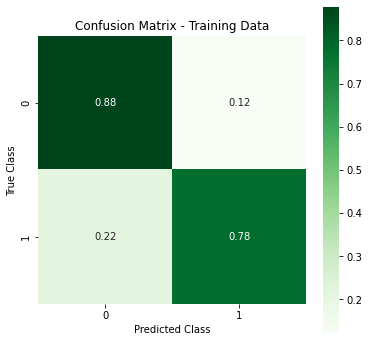

In [47]:
  def classification_report_cm(model, X_train,y_train,label='TRAINING DATA',
                            cm_figsize=(6,6),normalize='true',cmap='Greens'):
    """Gets predictions from a Keras neural network and get 
    classification report and confusion matrix."""
    ## Print report header, get preds, get class report, and conf matrix
    header =  '==='*24
    print(header,f"\t[i] CLASSIFICATION REPORT - {label}",header,sep='\n')
    print()
    
    ## Get predictions
    y_hat_train = model.predict(X_train)
    
    ## convert to 1D targets
    y_train_class =y_train.argmax(axis=1)
    y_hat_train_class = y_hat_train.argmax(axis=1)
    
    
    ## Get classification report 
    print(metrics.classification_report(y_train_class,y_hat_train_class))
    print()
    
    
    ## Plot the confusion Matrix
    cm = metrics.confusion_matrix(y_train_class, y_hat_train_class,
                                  normalize=normalize)
    
    fig,ax = plt.subplots(figsize=cm_figsize)
    sns.heatmap(cm, cmap=cmap, annot=True,square=True,ax=ax)
    ax.set(ylabel='True Class',xlabel='Predicted Class',
           title='Confusion Matrix - Training Data')    
    plt.show()

    
classification_report_cm(model,X_test_pad, y_test, label='TEST DATA')   

In [48]:
def evaluate_network(model, X_test, y_test, history=None, 
                        X_train = None, y_train = None,
                        history_figsize = (8,4), cm_figsize=(8,8),
                        cmap='Greens', normalize='true'):
    """Gets predictions and evaluates a classification model using
    sklearn.

    Args:
        model (classifier): a fit keras classification model.
        X_test (tensor/array): X data
        y_test (tensor/array): y data
        history (History object): model history from .fit
        X_train (tensor/array): If provided, compare model.score 
                                for train and test. Defaults to None.
        y_train (Series or Array, optional): If provided, compare model.score 
                                for train and test. Defaults to None.
                                
        history_figsize (tuple): figsize for each metric's history plot.
        cm_figsize (tuple): figsize for confusion matrix plot
      
        cmap (str, optional): Colormap for confusion matrix. Defaults to 'Greens'.
        normalize (str, optional): normalize argument for plot_confusion_matrix. 
                                    Defaults to 'true'.  
    """
    
    header =  '==='*24
    
    ## First, Plot History, if provided.
    if history is not None:
        print(header,'\t[i] MODEL HISTORY',header,sep='\n')
        plot_history(history,model,figsize=history_figsize)
        
        
    ## Evaluate Network for loss/acc scores
    print(header,"\t[i] EVALUATING MODEL",header,sep='\n')
    print()
    if X_train is not None:
        try:
            evaluate_scores(model,X_train,y_train,label='Training')
            print()

        except Exception as e:
            print("Error evaluating for accuracy for training data:")
            print(e)
        

    ## Evaluate test data
    evaluate_scores(model,X_test,y_test,label='Test')
    print("\n")

    
    ## Report for training data
    if X_train is not None:
        classification_report_cm(model, X_train, y_train, cmap=cmap,
                                 normalize=normalize,
                                 label='TRAINING DATA',cm_figsize=cm_figsize)       
        print('\n'*2)
    ## Report for test data
    classification_report_cm(model,X_test,y_test, cmap=cmap,
                             normalize=normalize,
                             label='TEST DATA',cm_figsize=cm_figsize)

    

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 50)          5013900   
_________________________________________________________________
lstm_1 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 52        
Total params: 5,021,552
Trainable params: 5,021,552
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/3
197/197 [==============================] - 20s 95ms/step - loss: 0.5510 - accuracy: 0.7189 - val_loss: 0.3660 - val_accuracy: 0.8505
Epoch 2/3
197/197 [==============================] - 19s 98ms/step - loss: 0.2720 - accuracy: 0.8964 - val_loss: 0.3569 - val_accuracy: 0.8449
Epoch 3/3
197/197 [==============================] - 18s 93ms/step - loss: 0.1809 - accuracy: 0.9365 - val_loss: 0.3777 - val_accuracy: 0.8376
	[i] MODEL HISTORY


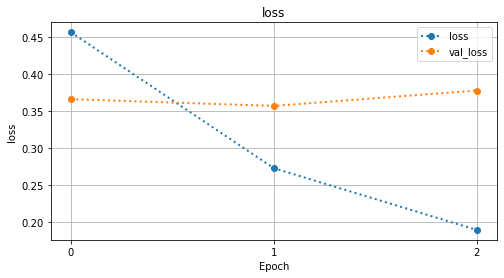

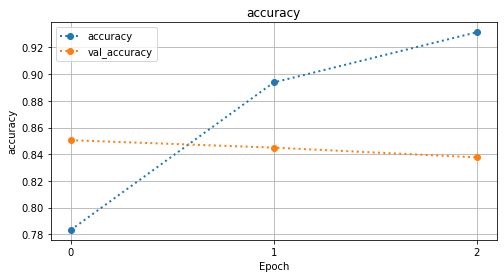

	[i] EVALUATING MODEL

	Training loss: 0.190
	Training accuracy: 0.937

	Test loss: 0.373
	Test accuracy: 0.845


	[i] CLASSIFICATION REPORT - TRAINING DATA

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     20902
           1       0.91      0.90      0.91     10598

    accuracy                           0.94     31500
   macro avg       0.93      0.93      0.93     31500
weighted avg       0.94      0.94      0.94     31500




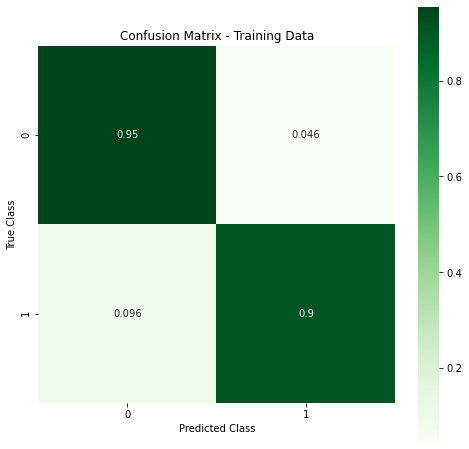




	[i] CLASSIFICATION REPORT - TEST DATA

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      9098
           1       0.77      0.75      0.76      4402

    accuracy                           0.85     13500
   macro avg       0.83      0.82      0.82     13500
weighted avg       0.84      0.85      0.84     13500




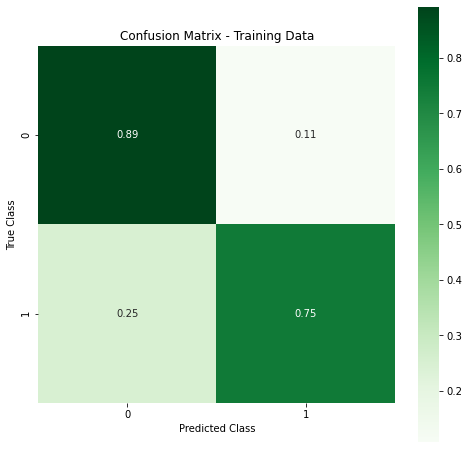

In [49]:
## make,fit model and evlaute
model = make_model()
history = model.fit(X_train_pad, y_train, epochs=3,
                    batch_size=128, validation_split=0.2,
                   workers=-1)
evaluate_network(model,X_test_pad,y_test,history,
                X_train = X_train_pad,y_train=y_train)

>- **Q: Whats one thing we haven't addressed, as part of classification-modeling workflow?**
    - Dealing with class imbalance/

### Compute Class Weights

In [50]:
## check class balance
y_tr_classes = pd.Series(y_train.argmax(axis=1))
y_tr_classes.value_counts(1)

0    0.663556
1    0.336444
dtype: float64

> Neural networks accept class weights, but cannot calculate them like sklearn models that accept `class_weight="balanced"`.
    - We can use sklearn's function to calculate the class weights to use in our neural netowork

In [51]:
from sklearn.utils.class_weight import compute_class_weight

## Get the array of weights for each unique class
weights= compute_class_weight(
           'balanced',
            np.unique(y_tr_classes),
            y_tr_classes)
weights

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classes=[0 1], y=0        0
1        1
2        0
3        1
4        0
        ..
31495    0
31496    0
31497    0
31498    0
31499    1
Length: 31500, dtype: int64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([0.75351641, 1.48612946])

In [52]:
## Turn the weights into a dict with the class name as the key
weights_dict = dict(zip( np.unique(y_tr_classes),weights))
weights_dict

{0: 0.753516409912927, 1: 1.486129458388375}

In [53]:
## Make and fit a new model, adding the class_weights
model = make_model()
history = model.fit(X_train_pad, y_train, epochs=3,
                    batch_size=128, validation_split=0.2,
                   workers=-1,class_weight=weights_dict)

evaluate_network(model,X_test_pad,y_test,history,
                X_train = X_train_pad,y_train=y_train)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 50)          5013900   
_________________________________________________________________
lstm_2 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 52        
Total params: 5,021,552
Trainable params: 5,021,552
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/3
158/197 [=======================>......] - ETA: 3s - loss: 0.5899 - accuracy: 0.7099

KeyboardInterrupt: 

## Using our Previously Trained Word2Vec Embeddings in an Embedding Layer
- https://ppasumarthi-69210.medium.com/word-embeddings-in-keras-be6bb3092831

In [ ]:
## Saving the total number of words as vocab size
vocab_size = len(tokenizer.index_word)
 
## Doubel check current embedding size and vocab size
vocab_size, EMBEDDING_SIZE

In [ ]:
### make a metrix of embedding weights
embedding_matrix = np.zeros((vocab_size+1, EMBEDDING_SIZE))

## for each item in the word index
for word, i in tokenizer.word_index.items():
    ## if word in w2vec model, fill in the embedding matrix
    if word in wv:
        embedding_vector = wv[word]
        embedding_matrix[i] = embedding_vector
        
embedding_matrix.shape

In [ ]:
## Make a keras embedding layer with emebdding_matrix
embedding_layer = layers.Embedding(len(tokenizer.word_index) + 1,
                            EMBEDDING_SIZE,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [ ]:
## update our make_model_w2v func wth embedding layer
def make_model_w2v():

    model=models.Sequential()
    
    ## Make a keras embedding layer with emebdding_matrix
    embedding_layer = layers.Embedding(len(tokenizer.word_index) + 1,
                            EMBEDDING_SIZE,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

    model.add(embedding_layer)
    
    model.add(layers.LSTM(25,return_sequences=False))
#     model.add(layers.Dropout(0.2))
    model.add(layers.Dense(25, activation='relu'))
    model.add(layers.Dense(n_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', 
                  metrics=['accuracy'])
    display(model.summary())
    return model

In [ ]:
## Test using function to train and evaluate
model = make_model_w2v()
history = model.fit(X_train_pad, y_train, epochs=10,
                    batch_size=128, validation_split=0.2,
                   workers=-1,class_weight=weights_dict)
evaluate_network(model,X_test_pad,y_test,history,
                X_train = X_train_pad,y_train=y_train)

# Overview  - Neural Network Tuning 

## Helpful Resources

- [Medium: Simple Guide to Hyperparameter Tuning in Neural Networks](https://towardsdatascience.com/simple-guide-to-hyperparameter-tuning-in-neural-networks-3fe03dad8594)
- [Medium: A guide to an efficient way to build neural network architectures- Part I:](https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b)
- [Medium: Optimizers for Neural Networks](https://medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6)

## Rules of Thumb for Training Neural Networks

- **Always use a train-test-validation split.**
    - **Train-test-val splits:**
        - Training set: for training the algorithm
        - Validation set: used during training
        - Testing set: after choosing the final model, use the test set for an unbiased estimate of performance.
    - **Set sizes:**
        - With big data, your val and test sets don't necessarily need to be 20-30% of all the data. 
        - You can choose test and hold-out sets that are of size 1-5%. 
            - eg. 96% train, 2% hold-out, 2% test set.
            
            
- Consider using a `np.random.seed` for reproducibility/comparing models


- **Use cross validation of some sort to compare Networks**


- Normalize/Standardize features
    
    
- **Add EarlyStopping and ModelCheckpoint [callbacks](https://keras.io/api/callbacks/)**

    

#### Dealing with Bias/Variance

- Balancing Bias/Variance:
    - High Bias models are **underfit**
    - High Variance models are **overfit**



- **Rules of thumb re: bias/variance trade-off:**

| High Bias? (training performance) | high variance? (validation performance)  |
|---------------|-------------|
| Use a bigger network|    More data     |
| Train longer | Regularization   |
| Look for other existing NN architextures |Look for other existing NN architextures |


## Rules of Thumb - Hyperparameters to Tune 


- This section is partially based on the blog post below. 
- However, I ordered the steps with my recommended order of importance/what-to-tune-first
- [Blog Post](https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b)

### Hyperparameters 

- Note: outline below is meant for Dense layers but will also generally be true for other layer types.

1. Number of layers (depends on the size of training data)


2. Number of neurons(depends on the size of training data)


3. Activation functions
    - Popular choices:
        - relu / leaky-relu
        - sigmoid / tanh (for shallow networks)
        
        
4. Optimizer:
    - Popular choices:
        - SGD (works well for shallow but gets stuck in local minima/saddle-points - if so use RMSProp)
        - RMSProp
        - Adam (general favorite)
        
        
5. Learning Rate
    - Try in powers of 10 (0.001,0.01,.1,1.0)
    - Which optimizer changes which l.r. is best (but try the others too).
        - SGD: 0.1
        - Adam: 0.001/0.01
    - Can use the `decay` parameter to reduce learning (though it is better to use adaptive optimizer than to adjust this)/.

7. Batch Size
    - Finding the "right" size is important
        - Too small = weights update too quickly and convergence is difficult
        - Too large = weights update too slowly (plus PC RAM issues)
    - Try batch sizes that are powers of 2 (for memory optimization)
    - Larger is better than smaller.
    
    
8. Number of Epochs:
    - Important parameter to tune
    - Use EarlyStopping callback to prevent overfitting
    

9. Adding Dropout
    - Usually use dropout rate of 0.2 to 0.5
    
    

10. Adding regularization (L1,L2)
    - Use when the model continues to over-fit even after adding Dropout
    
    
6. Initialization
    - Not as important as defaults (glorot-uniform) work well, but:
        - Use He-normal/uniform initialization when using ReLu
        - Use Glorot-normal/uniform when using Sigmoid
    - Avoid using all zeros or any constant for all neurons



### Easy-to-Add options to fight overfitting

#### Dropout 
<img src="https://raw.githubusercontent.com/flatiron-school/Online-DS-FT-022221-Cohort-Notes/master/Phase_4/topic_40-41_neural_networks/CL%20Repos/ds-neural_network_architecture-video/img/drop_out.png">

#### Early Stopping

- Monitor performance for decrease or plateau in performance, terminate process when given criteria is reached.

- **In Keras:**
    - Can be applied using the [callbacks function](https://keras.io/callbacks/)
```python    
from keras.callbacks import EarlyStopping
EarlyStopping(monitor='val_err', patience=5)
```
    - 'Monitor' denotes quanitity to check
    - 'val_err' denotes validation error
    - 'pateience' denotes # of epochs without improvement before stopping.
        - Be careful, as sometimes models _will_ continue to improve after a stagnant period


### Hyperparameter Details

#### Kernel Initialization
- Kernel Initializers
```python
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']```


#### Loss Functions
- MSE (regression)
- categorical cross-entropy (classification with 2D labels )
    - sparse categorical cross entropy (classification with 1D labels)
- binary cross-entropy (classification)
    - 2 categories
- **can also uses custom scoring functions**

## Using Regularization

### L1 & L2 Regularlization
- These methods of regularizaiton do so by penalizing coefficients(regression) or weights(neural networks),
    - L1 & L2 exist in regression models as well. There, L1='Lasso Regressions' , L2='Ridge regression'
    
<!--     

- **L1 & L2 regularization add a term to the cost function.**

$$Cost function = Loss (say, binary cross entropy) + Regularization term$$

$$ J (w^{[1]},b^{[1]},...,w^{[L]},b^{[L]}) = \dfrac{1}{m} \sum^m_{i=1}\mathcal{L}(\hat y^{(i)}, y^{(i)})+ \dfrac{\lambda}{2m}\sum^L_{l=1}||w^{[l]}||^2$$
- where $\lambda$ is the regularization parameter. 

- **The difference between  L1 vs L2 is that L1 is just the sum of the weights whereas L2 is the sum of the _square_of the weights.**  
 -->

<br><br>
- **L1 Regularization:**
    $$ Cost function = Loss + \frac{\lambda}{2m} * \sum ||w||$$
    - Uses the absolute value of weights and may reduce the weights down to 0. 
    
        
- **L2 Regularization:**:
    $$ Cost function = Loss + \frac{\lambda}{2m} * \sum ||w||^2$$
    - Also known as weight decay, as it forces weights to decay towards zero, but never exactly 0.. 

#### L1/L2 Regularization

- **CHOOSING L1 OR L2:**
    - L1 is very useful when trying to compress a model. (since weights can decreae to 0)
    - L2 is generally preferred otherwise.
    
    
- **USING L1/L2 IN KERAS:**
    - Add a kernel_regulaizer to a  layer.
```python 
from keras import regularizers
model.add(Dense(64, input_dim=64, kernel_regularizer=regularizers.l2(0.01))
```
    - here 0.01 = $\lambda$

# Activity Part 2: Tuning Our Neural Network

## Adding Callbacks

### Keras Callbacks



- [Official Callback documentation](https://keras.io/callbacks/)
- CallBacks You'll Definitely Want to Use
 - `tensorflow.keras.callbacks.EarlyStopping`[ALWAYS!]
  - `tensorflow.keras.callbacks.ModelCheckpoint` [Always, if on Colab]

- Callbacks worth further exploration
 - `tensorflow.keras.callbacks.callbacks.LearningRateScheduler`
     - May be outdated in tf 2.x

In [ ]:
## import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

In [ ]:
## Make folder for models
model_folder = './models/'
os.makedirs(model_folder,exist_ok=True)
os.listdir(model_folder)

In [ ]:
## make checkpoints 
early_stop = EarlyStopping(monitor='val_accuracy',patience=4,verbose=1,
                          restore_best_weights=True)

checkpoint = ModelCheckpoint(model_folder,verbose=0,save_best_only=True)

In [ ]:
### You can use {} to insert values in your checkpoint names
# filepath=folder+"weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
# checkpoint = ModelCheckpoint(filepath,verbose=1,save_best_only=True,
#                             save_weights_only=True)

In [ ]:
## paste in our prior model function and fitting/eval code, but add callbacks

def make_model_w2v():
    
    model=models.Sequential()
    ## Make a keras embedding layer with emebdding_matrix
    embedding_layer = layers.Embedding(len(tokenizer.word_index) + 1,
                            EMBEDDING_SIZE,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

    model.add(embedding_layer)
    model.add(layers.LSTM(25,return_sequences=False))

    model.add(layers.Dense(25, activation='relu'))
    model.add(layers.Dense(n_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', 
                  metrics=['accuracy'])
    display(model.summary())
    return model



## Test using function to train and evaluate
model = make_model_w2v()
history = model.fit(X_train_pad, y_train, epochs=10,
                    batch_size=128, validation_split=0.2,
                    callbacks=[early_stop,checkpoint],
                   workers=-1,class_weight=weights_dict)
evaluate_network(model,X_test_pad,y_test,history,
                X_train = X_train_pad,y_train=y_train)

# Gridsearching with Keras & Scikit-Learn

## HyperParameter Tuning with GridSearchCV & Keras

Original Source: https://chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparameters/
<br><br>

- To use `GridSearchCV` or other similar functions in scikit-learn with a Keras neural network, we need to wrap our keras model in `keras.wrappers.scikit_learn`'s `KerasClassifier` and `KerasRegressor`.

1. To do this, we need to write a build function(`build_fn`) that creates our model such as `create_model`.
    - This function must accept whatever parameters you wish to tune. 
    - It also must have a default argument for each parameter.
    - This function must Return the model (and only the model)
    
<!-- 
```python

## Define the build function
def create_model(n_units=(50,25,7), activation='relu',final_activation='softmax',
                optimizer='adam'):
    
    ## Pro tip:save the local variables now so you can print out the parameters used to create the model.
    params_used = locals()
    print('Parameters for model:\n',params_used)
    
   
    from keras.models import Sequential
    from keras import layers
    
    model=Sequential()
    model.add(layers.Dense(n_units[0], activation=activation, input_shape=(2000,)))
    model.add(layers.Dense(n_units[1], activation=activation))
    model.add(layers.Dense(n_units[2], activation=final_activation))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
    
    display(model.summary())
    return model 
```     -->

2. We then create out model using the Keras wrapper:

```python
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
neural_network =  KerasClassifier(build_fn=create_model,verbose=1)
```

3. Now, set up the hyperparameter space for grid search. (Remember, your `create_model` function must accept the parameter you want to tune)

```python
params_to_test = {'n_units':[(50,25,7),(100,50,7)],
                  'optimizer':['adam','rmsprop','adadelta'],
                  'activation':['linear','relu','tanh'],
                  'final_activation':['softmax']}
```

4. Now instantiate your GridSearch function

```python
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=neural_network,param_grid=params_to_test)
grid_result = grid.fit(X_train, y_train)
best_params = grid_result.best_params_
```
5. And thats it!

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# make a new make_tune_model function to tune the # of units
# and if embeddings are trainable
def make_tune_model(trainable=False,n_lstm_units=25,dropout=0):
    model=models.Sequential()
    ## Make a keras embedding layer with emebdding_matrix
    embedding_layer = layers.Embedding(len(tokenizer.word_index) + 1,
                            EMBEDDING_SIZE,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=trainable)

    model.add(embedding_layer)
    model.add(layers.LSTM(n_lstm_units,return_sequences=False))
    # model.add(layers.GlobalAvgPool1D())
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(25, activation='relu'))
    model.add(layers.Dense(n_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', 
                  metrics=['accuracy'])
    display(model.summary())
    return model

In [ ]:
# ## make a model with sklearn wrapper
# wrapped_model = KerasClassifier(make_tune_model)
# wrapped_model.fit(X_train_pad,y_train, 
#                   epochs=3, validation_split=0.2)

In [ ]:
## make anew early stopping with shorter patience, do not restore best weights
early_stop = EarlyStopping(monitor='val_accuracy',patience=0,verbose=1,
                          restore_best_weights=False)

In [ ]:
# params = {'n_lstm_units':[25,50],
#          'trainable':[True,False]}
# grid = GridSearchCV(KerasClassifier(make_tune_model), 
#                     params,cv=2,n_jobs=-1,verbose=1)

# grid.fit(X_train_pad,y_train, epochs=3, 
#          callbacks=[early_stop],
#          validation_split=0.2)

# grid.best_params_

In [ ]:
## Set up params grid for 25,509 units and trianable true/false
params = {'n_lstm_units':[25,50],
         'trainable':[True,False]}


## Make and fit grid, check best params
grid = GridSearchCV(KerasClassifier(make_tune_model), 
                    params,cv=2,n_jobs=-1,verbose=1)

grid.fit(X_train_pad,y_train, epochs=3, 
         callbacks=[early_stop],
         validation_split=0.2)

grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
raise Exception('The following cells are not guaranteed to run!')

# APPENDIX

## Tensorboard Callback
- https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks

> Add tensorboard callback

In [ ]:
%load_ext tensorboard
logdir = './logs/'
os.makedirs(logdir,exist_ok=True)
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


In [ ]:
## Test using function to train and evaluate
model = make_model()
history = model.fit(X_train_pad, y_train, epochs=3,
                    batch_size=64, validation_split=0.2,
                   workers=-1,callbacks=[tensorboard_callback])
evaluate_network(model,X_test_pad,y_test,history,
                X_train = X_train_pad,y_train=y_train)

In [ ]:
# %tensorboard --logdir logs

## LSTM vs GRU

In [ ]:
## GRU Model
from keras import models, layers, optimizers, regularizers
modelG = models.Sequential()

## Get and add embedding_layer
# embedding_layer = ji.make_keras_embedding_layer(wv, X_train)
modelG.add(Embedding(MAX_WORDS, EMBEDDING_SIZE))

# modelG.add(layers.SpatialDropout1D(0.5))
# modelG.add(layers.Bidirectional(layers.GRU(units=100, dropout=0.5, recurrent_dropout=0.2,return_sequences=True)))
modelG.add(layers.Bidirectional(layers.GRU(units=100, dropout=0.5, recurrent_dropout=0.2)))
modelG.add(layers.Dense(2, activation='softmax'))

modelG.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['acc'])#,'val_acc'])#, callbacks=callbacks)
modelG.summary()

In [ ]:

history = modelG.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_hat_test = modelG.predict_classes(X_test)
kg.evaluate_model(y_test,y_hat_test,history)

## Using Pre-Trained Vectors

In [ ]:
import os
folder = '/Users/jamesirving/Datasets/'#glove.twitter.27B/'
# print(os.listdir(folder))
glove_file = folder+'glove.6B/glove.6B.50d.txt'#'glove.twitter.27B.50d.txt'
glove_twitter_file = folder+'glove.twitter.27B/glove.twitter.27B.50d.txt'
print(glove_file)
print(glove_twitter_file)

#### Keeping only the vectors needed

In [ ]:
# ## This line of code for getting all words bugs me
# total_vocabulary = set(word for tweet in data_lower for word in tweet)
# len(total_vocabulary)

In [ ]:
# glove = {}
# with open(glove_file,'rb') as f:#'glove.6B.50d.txt', 'rb') as f:
#     for line in f:
#         parts = line.split()
#         word = parts[0].decode('utf-8')
#         if word in total_vocabulary:
#             vector = np.array(parts[1:], dtype=np.float32)
#             glove[word] = vector

In [ ]:
# glove['republican']

### Converting Glove to Word2Vec format

- Getting glove into w2vec format:
    - https://radimrehurek.com/gensim/scripts/glove2word2vec.html

In [ ]:
glove_folder = folder+'glove.twitter.27B'
os.listdir(glove_folder)

In [ ]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = datapath(glove_twitter_file)
tmp_file = get_tmpfile(glove_folder+'glove_to_w2vec.txt')
_ = glove2word2vec(glove_file, tmp_file)
model_glove = KeyedVectors.load_word2vec_format(tmp_file)

In [ ]:
model_glove.wv

## Using Embeddings in Classification Models - sci-kit learn

- Embeddings can be used in Artificial Neural Networks as an input Embedding Layer
- Embeddings can be used in sci-kit learn models by taking the mean vector of a text/document and using the mean vector as the input into the model. 

### Creating Mean Embeddings

In [ ]:
## This line of code for getting all words bugs me
total_vocabulary = set(word for tweet in data_lower for word in tweet)
len(total_vocabulary)

In [ ]:
glove = {}
with open(glove_file,'rb') as f:#'glove.6B.50d.txt', 'rb') as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode('utf-8')
        if word in total_vocabulary:
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector

In [ ]:
from sklearn.model_selection import train_test_split
from nltk import word_tokenize

y = pd.get_dummies(df['is_trump'],drop_first=True).values
X = df['text'].str.lower().map(word_tokenize)

X_idx = list(range(len(X)))
train_idx,test_idx = train_test_split(X_idx,random_state=123)

X[train_idx]

In [ ]:
def train_test_split_idx(X, y, train_idx,test_idx):
    # try count vectorized first
    X_train = X[train_idx].copy()
    y_train = y[train_idx].copy()
    X_test = X[train_idx].copy()
    y_test = y[train_idx].copy()
    return X_train, X_test,y_train, y_test

X_train, X_test,y_train, y_test = train_test_split_idx(X,y,train_idx,test_idx)

In [ ]:
# df['combined_text'] = df['headline'] + ' ' + df['short_description']
# data = df['combined_text'].map(word_tokenize).values

In [ ]:
class W2vVectorizer(object):
    
    def __init__(self, w2v):
        # Takes in a dictionary of words and vectors as input
        self.w2v = w2v
        if len(w2v) == 0:
            self.dimensions = 0
        else:
            self.dimensions = len(w2v[next(iter(glove))])
    
    # Note: Even though it doesn't do anything, it's required that this object implement a fit method or else
    # it can't be used in a scikit-learn pipeline  
    def fit(self, X, y):
        return self
            
    def transform(self, X):
        return np.array([
            np.mean([self.w2v[w] for w in words if w in self.w2v]
                   or [np.zeros(self.dimensions)], axis=0) for words in X])

## NLP Task Option 2

2. Coronavirus Tweet Sentiment https://www.kaggle.com/datatattle/covid-19-nlp-text-classification

In [ ]:
# os.listdir("/Users/jamesirving/Downloads/archive (1)/")

In [ ]:
# ### Saving smaller gz file
# corona_df = pd.read_csv('/Users/jamesirving/Downloads/archive (1)/Corona_NLP_train.csv',
#                        encoding='latin-1')
# corona_df

In [ ]:
# os.makedirs('./data/',exist_ok=True)
# corona_df.to_csv('data/cornavirus_tweets.csv.gz',compression='gzip',index=False)

In [ ]:
# corona_df = pd.read_csv('data/cornavirus_tweets.csv.gz',
#                        encoding='latin-1')
# corona_df

In [ ]:
# corona_df['Sentiment'].value_counts(1)